## Feature Scaling
- Standardization
- Normalization

In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame({'f1': [15, 18, 12, 10],
 'f2': [1, 3, 2, 5]})
df

,f1,f2
0,15,1
1,18,3
2,12,2
3,10,5


In [3]:
df.describe()

,f1,f2
count,4.00,4.000000
mean,13.75,2.750000
std,3.50,1.707825
min,10.00,1.000000
25%,11.50,1.750000
50%,13.50,2.500000
75%,15.75,3.500000
max,18.00,5.000000


## a) MaxAbsScaler
### Numpy

In [4]:
f1_max =[x/abs(np.max(df.f1)) for x in df.f1]
f2_max =[x/abs(np.max(df.f2)) for x in df.f2]
df1 = pd.DataFrame({'f1':f1_max, "f2": f2_max})
df1

,f1,f2
0,0.833333,0.2
1,1.000000,0.6
2,0.666667,0.4
3,0.555556,1.0


### Sklearn Transformer

In [5]:
mas = MaxAbsScaler()
arr = mas.fit_transform(df)
df2 = pd.DataFrame(data=arr, columns=df.columns)
df2

,f1,f2
0,0.833333,0.2
1,1.000000,0.6
2,0.666667,0.4
3,0.555556,1.0


### Visualize before and after scaling

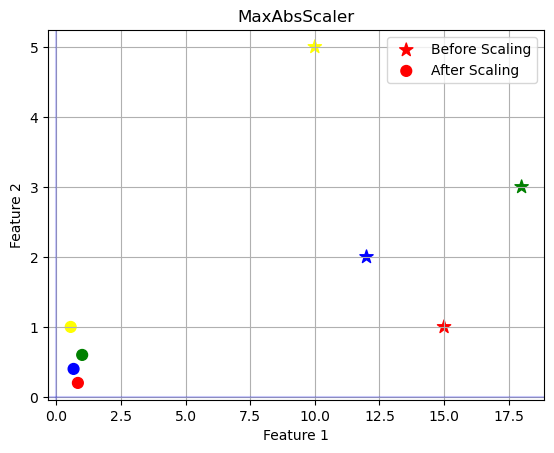

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
colors = ['red','green','blue','yellow']
ax.scatter(x=df.f1, y=df.f2, label="Before Scaling", color=colors, marker = '*',s=100)
ax.scatter(x=df2.f1, y=df2.f2, label="After Scaling", color=colors, marker = 'o',s=60)
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
plt.title("MaxAbsScaler")
plt.legend(loc='best')
plt.axhline(0, color='blue',alpha=0.2)
plt.axvline(0, color='blue',alpha=0.2);
plt.grid(True)


## 2) Min Max Scaler
### Numpy

In [7]:
f1_minmax = [(x-np.min(df.f1))/(np.max(df.f1)-np.min(df.f1)) for x in df.f1]
f2_minmax = [(x-np.min(df.f2))/(np.max(df.f2)-np.min(df.f2)) for x in df.f2]
df3 = pd.DataFrame({"f1":f1_minmax, "f2":f2_minmax})
df3

,f1,f2
0,0.625,0.00
1,1.000,0.50
2,0.250,0.25
3,0.000,1.00


### Trasformer

In [8]:
mms = MinMaxScaler()
arr1 = mms.fit_transform(df)
df4 = pd.DataFrame(data = arr1, columns=df.columns)
df4

,f1,f2
0,0.625,0.00
1,1.000,0.50
2,0.250,0.25
3,0.000,1.00


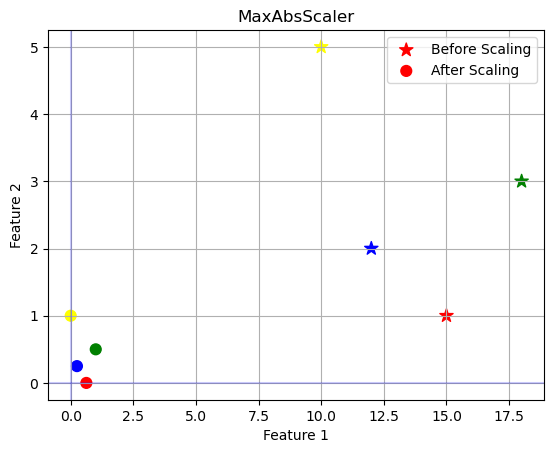

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
colors = ['red','green','blue','yellow']
ax.scatter(x=df.f1, y=df.f2, label="Before Scaling", color=colors, marker = '*',s=100)
ax.scatter(x=df4.f1, y=df4.f2, label="After Scaling", color=colors, marker = 'o',s=60)
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
plt.title("MaxAbsScaler")
plt.legend(loc='best')
plt.axhline(0, color='blue',alpha=0.2)
plt.axvline(0, color='blue',alpha=0.2);
plt.grid(True)

## 3) Standard Scaler
### Numpy

In [10]:
f1_s = [(x-np.mean(df.f1))/(np.std(df.f1)) for x in df.f1]
f2_s = [(x-np.mean(df.f2))/(np.std(df.f2)) for x in df.f1]
df5 = pd.DataFrame({'f1':f1_s, "f2": f2_s})
df5

,f1,f2
0,0.412393,8.282512
1,1.402136,10.310882
2,-0.577350,6.254141
3,-1.237179,4.901895


### Transformer

In [11]:
ss = StandardScaler()
arr3 = ss.fit_transform(df)
df6 = pd.DataFrame(data=arr3, columns=df.columns)
df6

,f1,f2
0,0.412393,-1.183216
1,1.402136,0.169031
2,-0.577350,-0.507093
3,-1.237179,1.521278


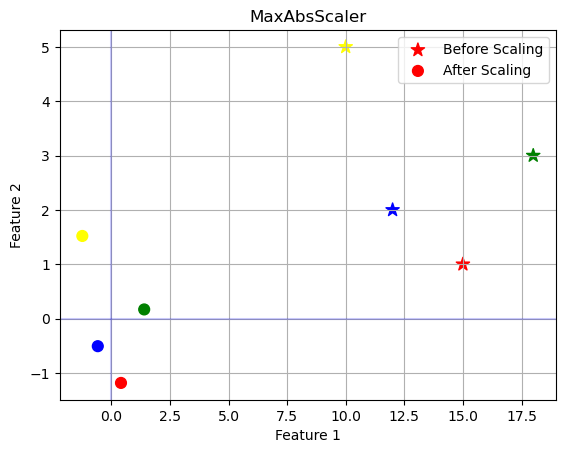

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
colors = ['red','green','blue','yellow']
ax.scatter(x=df.f1, y=df.f2, label="Before Scaling", color=colors, marker = '*',s=100)
ax.scatter(x=df6.f1, y=df6.f2, label="After Scaling", color=colors, marker = 'o',s=60)
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
plt.title("MaxAbsScaler")
plt.legend(loc='best')
plt.axhline(0, color='blue',alpha=0.2)
plt.axvline(0, color='blue',alpha=0.2);
plt.grid(True)

## 4) Robust Scaler
### Numpy

In [13]:
f1_r = [(x-np.median(df.f1))/(df.f1.quantile(0.75)-df.f1.quantile(0.25)) for x in df.f1]
f2_r = [(x-np.median(df.f2))/(df.f2.quantile(0.75)-df.f2.quantile(0.25)) for x in df.f2]
df7 = pd.DataFrame({"f1":f1_r, "f2":f2_r})
df7

,f1,f2
0,0.352941,-0.857143
1,1.058824,0.285714
2,-0.352941,-0.285714
3,-0.823529,1.428571


### Transformer

In [14]:
rs = RobustScaler()
arr4 = rs.fit_transform(df)
df8 = pd.DataFrame(data=arr4, columns=df.columns)
df8

,f1,f2
0,0.352941,-0.857143
1,1.058824,0.285714
2,-0.352941,-0.285714
3,-0.823529,1.428571


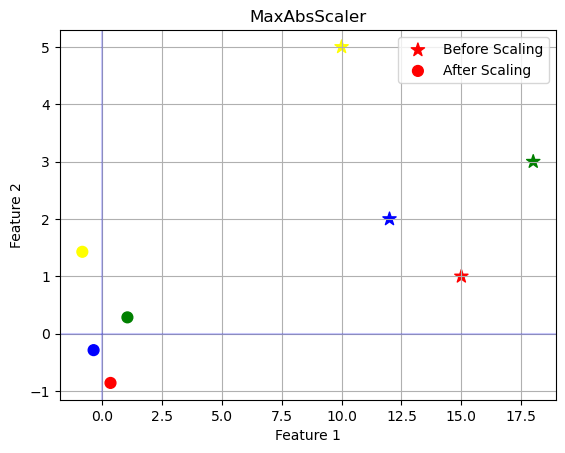

In [15]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
colors = ['red','green','blue','yellow']
ax.scatter(x=df.f1, y=df.f2, label="Before Scaling", color=colors, marker = '*',s=100)
ax.scatter(x=df8.f1, y=df8.f2, label="After Scaling", color=colors, marker = 'o',s=60)
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
plt.title("MaxAbsScaler")
plt.legend(loc='best')
plt.axhline(0, color='blue',alpha=0.2)
plt.axvline(0, color='blue',alpha=0.2);
plt.grid(True)

### Perform on Real Dataset

In [17]:
df = pd.read_csv("datasets/scaling-data1.csv")
df

,age,salary,target
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [18]:
df.describe()

,age,salary,target
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     400 non-null    int64
 1   salary  400 non-null    int64
 2   target  400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


### Train Test Split

In [20]:
X = df.drop("target", axis=1)
y = df['target']
X, y

(     age  salary
 0     19   19000
 1     35   20000
 2     26   43000
 3     27   57000
 4     19   76000
 ..   ...     ...
 395   46   41000
 396   51   23000
 397   50   20000
 398   36   33000
 399   49   36000
 
 [400 rows x 2 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 395    1
 396    1
 397    1
 398    0
 399    1
 Name: target, Length: 400, dtype: int64)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=54)

In [27]:
ss = StandardScaler()
ss.fit(X_train[['age', 'salary']])
X_train_scale = ss.transform(X_train[['age', 'salary']])
X_test_scale = ss.transform(X_test[['age', 'salary']])
x_train_scaled = pd.DataFrame(data=X_train_scale, columns=X_train.columns)
x_test_scaled = pd.DataFrame(data=X_test_scale, columns=X_test.columns)

In [28]:
x_train_scaled

,age,salary
0,0.226798,-0.160423
1,0.132176,1.040916
2,0.889155,1.246022
3,-1.760273,0.161888
4,1.646135,-0.922247
...,...,...
315,0.699910,-1.420363
316,2.024624,0.161888
317,1.078400,-0.922247
318,0.321421,-0.306927


In [29]:
x_test_scaled

,age,salary
0,1.456890,0.044684
1,-1.287161,-1.391062
2,-0.057069,-0.541335
3,0.226798,0.044684
4,-0.624804,-1.068751
...,...,...
75,0.226798,-0.394830
76,-0.246314,0.132587
77,0.037553,-0.599937
78,0.416043,-0.482733


In [30]:
np.round(x_train_scaled.describe(), 2)

,age,salary
count,320.00,320.00
mean,0.00,-0.00
std,1.00,1.00
min,-1.85,-1.63
25%,-0.81,-0.78
50%,-0.06,-0.03
75%,0.79,0.51
max,2.12,2.33


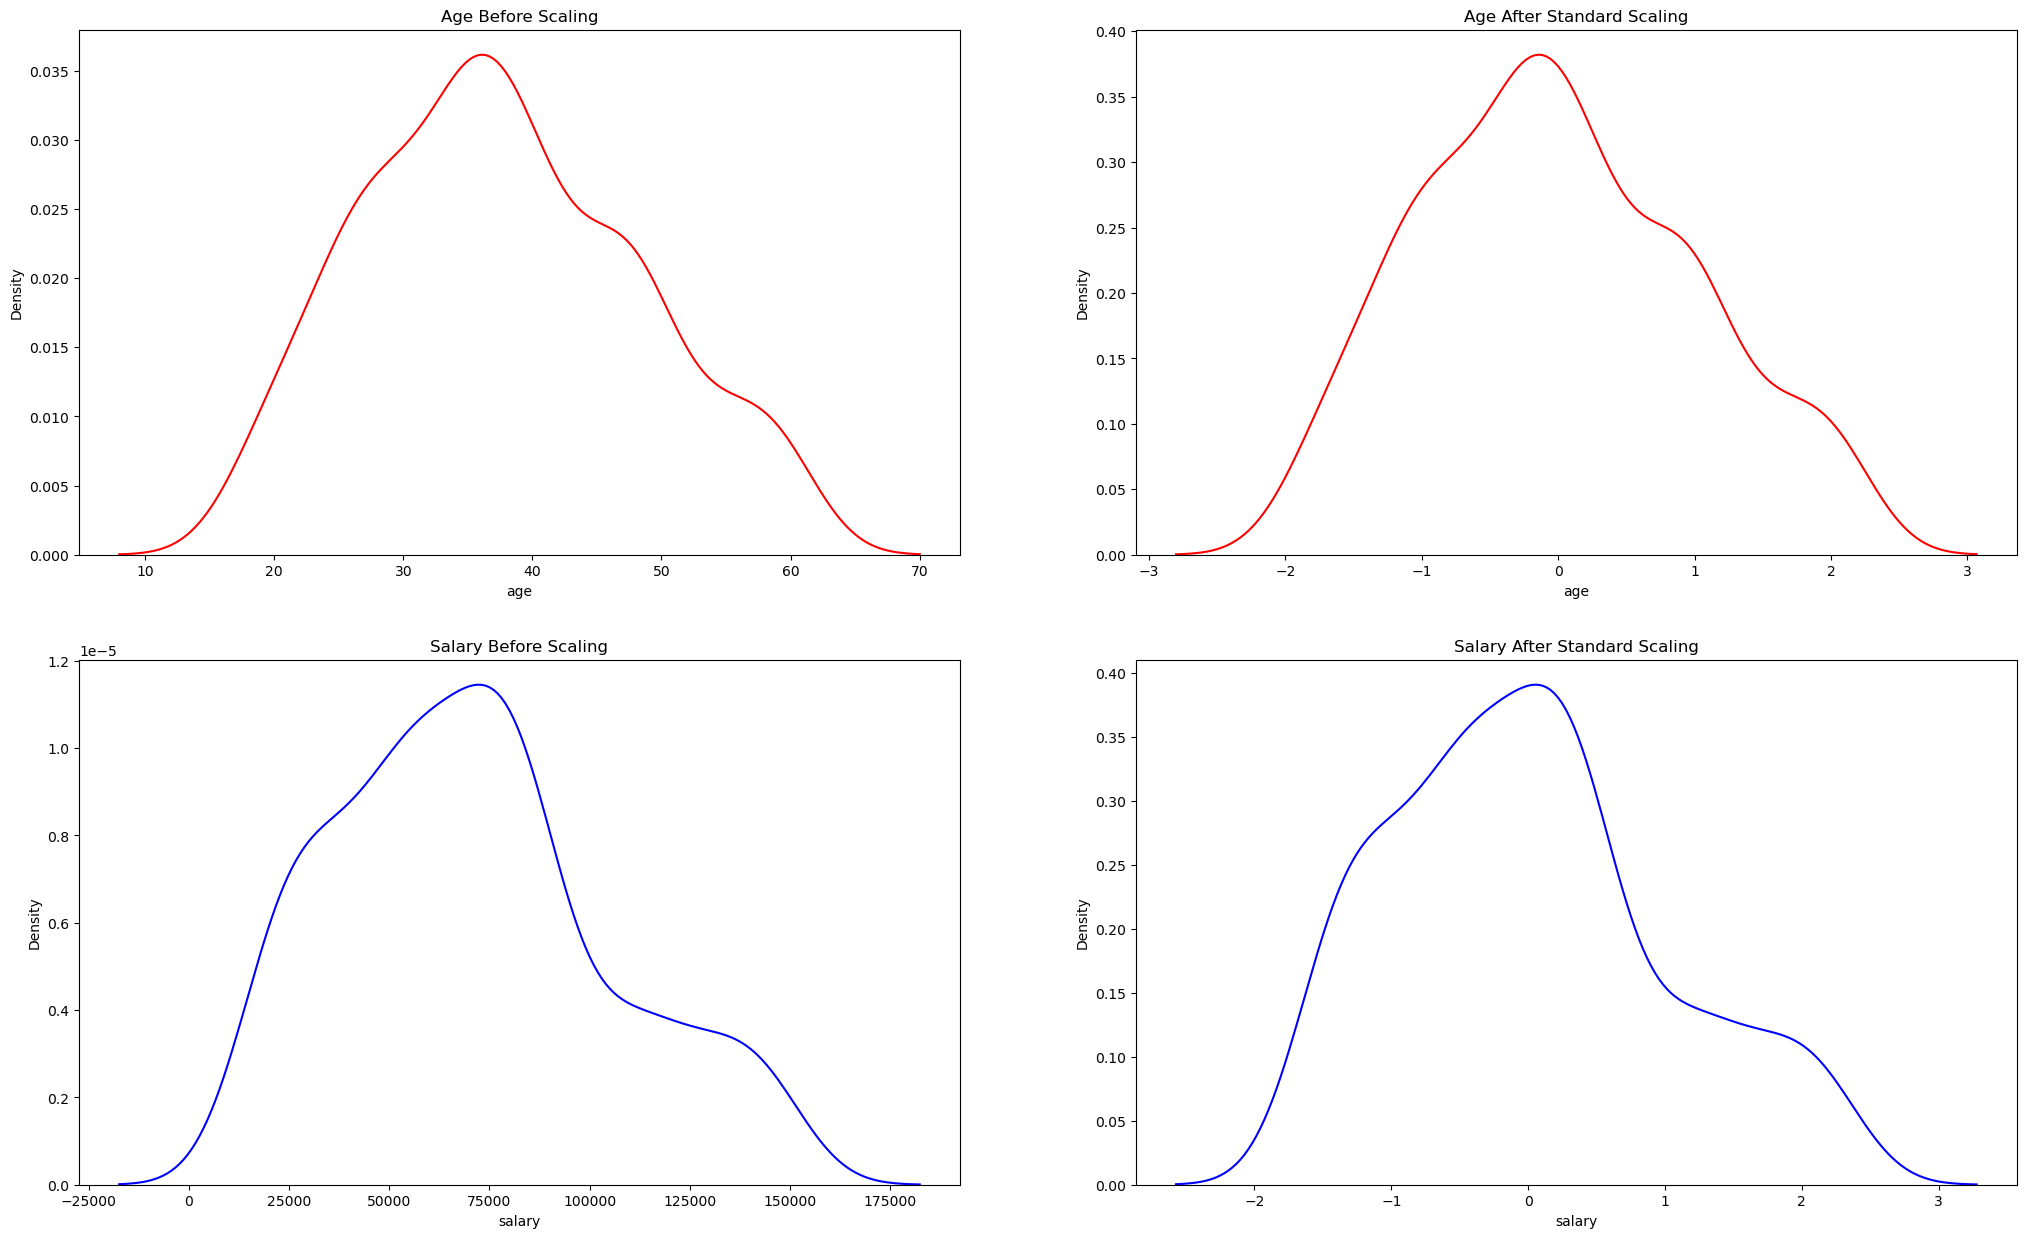

In [33]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols = 2, figsize =(25, 15))
# age before scaling
ax1.set_title('Age Before Scaling')
sns.kdeplot(X_train['age'], ax=ax1, color ='red')
# age after scaling
ax2.set_title('Age After Standard Scaling')
sns.kdeplot(x_train_scaled['age'], ax=ax2, color ='red')
# salary before scaling
ax3.set_title('Salary Before Scaling')
sns.kdeplot(X_train['salary'], ax=ax3, color ='blue')
# salary after scaling
ax4.set_title('Salary After Standard Scaling')
sns.kdeplot(x_train_scaled['salary'], ax=ax4, color ='blue')
plt.show()